In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D

# Data

In [2]:
student = pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/montecarlo_2/Student.csv")
montecarlo_kd = pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/montecarlo_2/KD_0.01_2.5.csv")
kd_ig_1 = pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/montecarlo_2/KD_IG_0.01_2.5_part1.csv")
kd_ig_2= pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/montecarlo_2/KD_IG_0.01_2.5_part2.csv")
kd_ig_at = pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/montecarlo_2/KD_IG_AT.csv")
kd = pd.read_csv("../../../ML/PyTorch_CIFAR10/Histories/Tuned_kd.csv")

In [3]:
kd_ig = pd.concat([kd_ig_1, kd_ig_2], axis=0)

In [4]:
kd.head()

,Alpha,Temperature,Test Acc.
0,0.0005,1.5,91.62
1,0.0005,2.0,91.77
2,0.0005,2.5,91.57
3,0.0005,3.0,91.55
4,0.0005,4.0,91.77


In [5]:
# Extracting the data
alpha = np.array(kd["Alpha"])
temp = np.array(kd["Temperature"])
accuracy = np.array(kd["Test Acc."])

In [6]:
# Find the index of the maximum accuracy
max_index = np.argmax(accuracy)

# Coordinates of the point with the highest accuracy
max_alpha = alpha[max_index]
max_temp = temp[max_index]
max_accuracy = accuracy[max_index]

In [7]:
print(max_accuracy, max_alpha, max_temp)

92.29 0.01 2.5


# 3D Plot

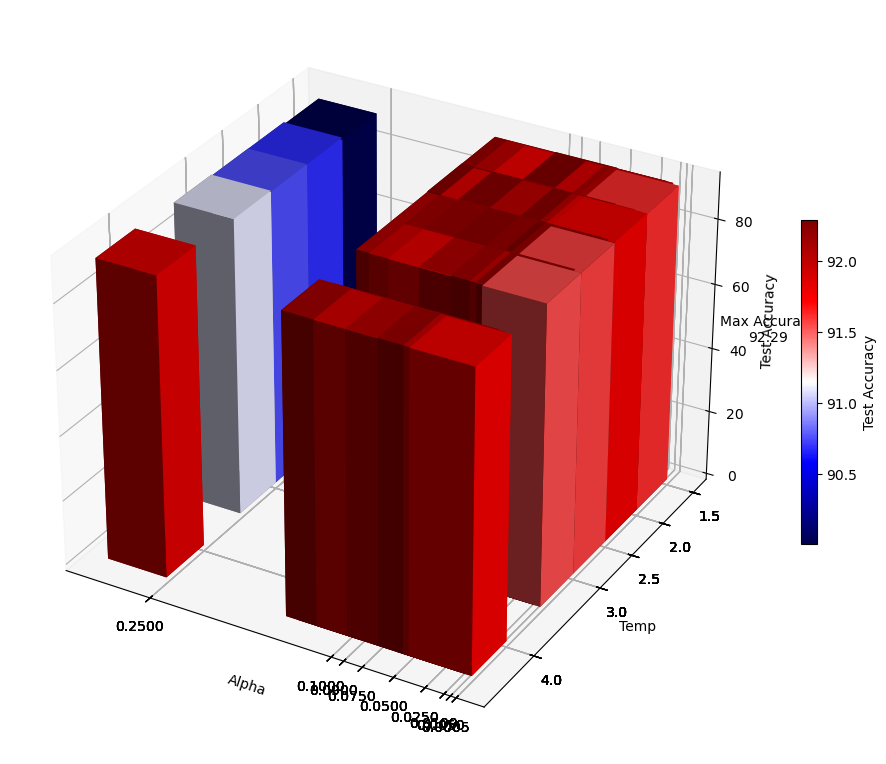

In [8]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on accuracy values
norm = plt.Normalize(accuracy.min(), accuracy.max())
colors = plt.cm.seismic(norm(accuracy))

# Plotting the 3D bars
ax.bar3d(alpha, temp, np.zeros_like(accuracy), 0.05, 0.5, accuracy, color=colors)

# Annotate the maximum accuracy bar
ax.text(max_alpha-0.24, max_temp+2.5, max_accuracy + 40, f"Max Accuracy\n{max_accuracy:.2f}", color='black', ha='center')

# Adjust the view angle for better visibility
ax.view_init(elev=30, azim=120)

# Adding labels
ax.set_xlabel('Alpha')
ax.set_xticks(alpha)
ax.set_ylabel('Temp')
ax.set_yticks(temp)
ax.set_zlabel('Test Accuracy')

# Add a color bar which maps values to colors
mappable = plt.cm.ScalarMappable(cmap=plt.cm.seismic, norm=norm)
mappable.set_array(accuracy)

# Create a colorbar with correct placement
cbar = fig.colorbar(mappable, ax=ax, shrink=0.15, aspect=20)
cbar.set_label('Test Accuracy')

plt.show()

In [9]:
# Unique values of Alpha and Temp
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temperature'].unique())

# Meshgrid for Alpha and Temp
X, Y = np.meshgrid(unique_alpha, unique_temp)

# Map Test Accuracy to the grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        # Selecting the Test Accuracy value corresponding to each pair of (alpha, temp)
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temperature'] == temp)]['Test Acc.'].values[0]

# Surface Plot

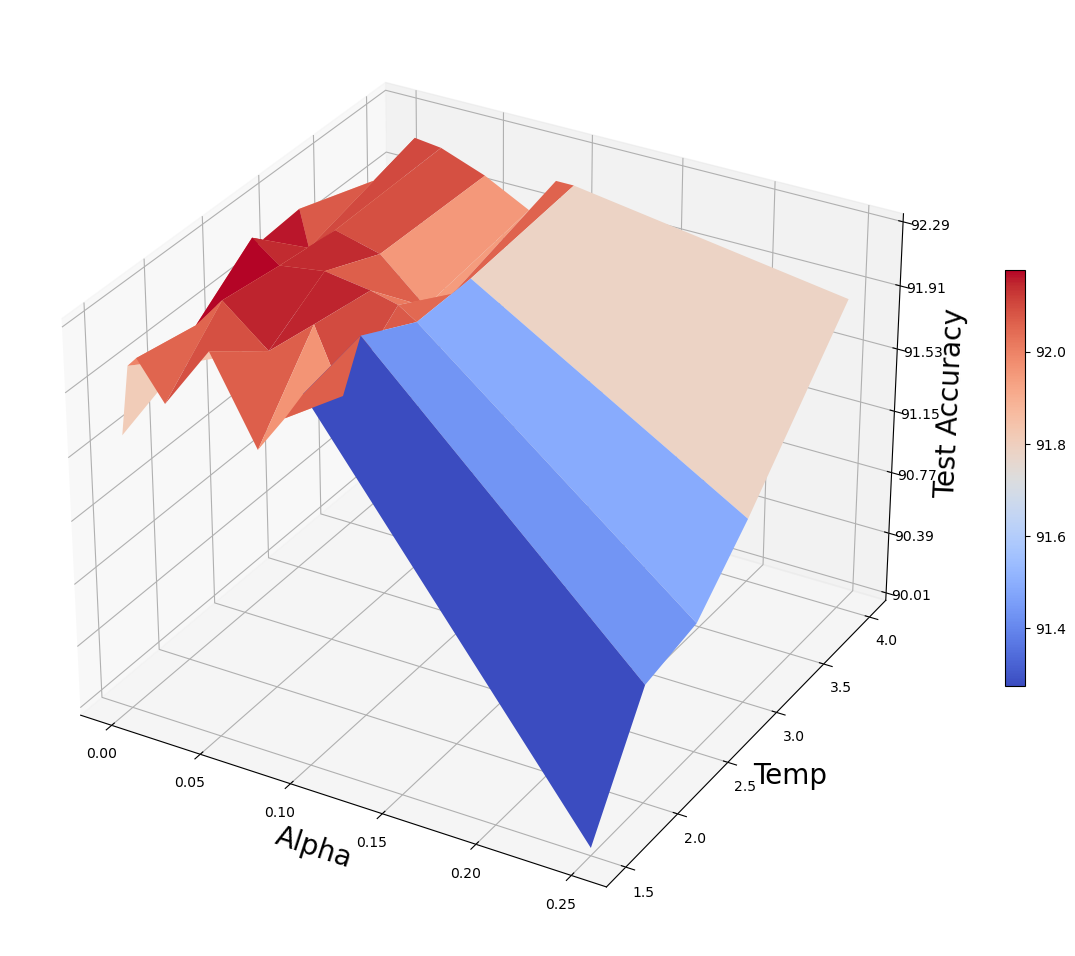

In [10]:
# Creating a 3D bar plot
fig = plt.figure(figsize=(12,28))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, accuracy_grid, cmap=cm.coolwarm, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(accuracy_grid.min(), accuracy_grid.max())
ax.zaxis.set_major_locator(LinearLocator(7))
ax.zaxis.set_major_formatter('{x:.02f}')

# Labels for axes
ax.set_xlabel('Alpha', fontsize=20)
ax.set_ylabel('Temp', fontsize=20)
ax.set_zlabel('Test Accuracy', fontsize=20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.15, aspect=20)
# plt.savefig('/Users/davidhernandez/Desktop/Nordling_Lab/nordlinglab-grants-publications/Article_Chang2024_integrated_gradients/sn_version_corrected/article/Figures/surface_plot.pdf')
plt.tight_layout()
plt.show()

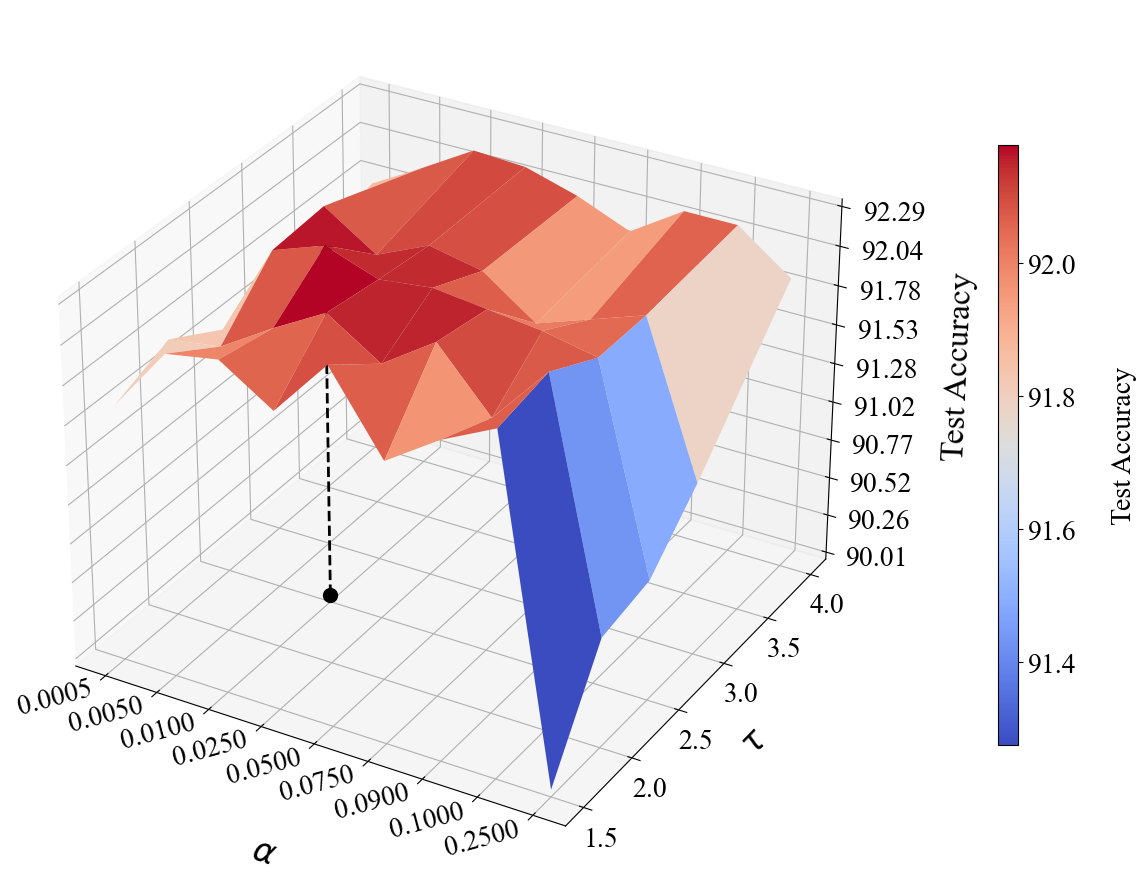

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FuncFormatter

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Assuming kd is your DataFrame
unique_alpha = np.sort(kd['Alpha'].unique())
unique_temp = np.sort(kd['Temperature'].unique())

# Map Alpha values to categorical indices
alpha_indices = {alpha: i for i, alpha in enumerate(unique_alpha)}

# Meshgrid for categorical indices of Alpha and Temp
X, Y = np.meshgrid(range(len(unique_alpha)), unique_temp)

# Map Test Accuracy to the grid
accuracy_grid = np.empty(X.shape)
for i, alpha in enumerate(unique_alpha):
    for j, temp in enumerate(unique_temp):
        accuracy_grid[j, i] = kd[(kd['Alpha'] == alpha) & (kd['Temperature'] == temp)]['Test Acc.'].values[0]

# Finding the indices of the maximum accuracy
max_index = np.unravel_index(np.argmax(accuracy_grid), accuracy_grid.shape)
max_accuracy = accuracy_grid[max_index]
max_alpha = unique_alpha[max_index[1]]
max_temp = unique_temp[max_index[0]]

# Creating a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, accuracy_grid, cmap=cm.coolwarm, linewidth=1, antialiased=True)

# Highlight the maximum with a line
ax.plot([max_index[1], max_index[1]], [max_temp, max_temp], [accuracy_grid.min(), max_accuracy], color='k', marker='o', markersize=10, linestyle="--", linewidth=2)

# Customize the x-axis to show original Alpha values
ax.set_xticks(range(len(unique_alpha)))
ax.set_xticklabels([f'{alpha:.4f}' for alpha in unique_alpha], rotation=15, ha='right', va='center')

# Customize the z axis.
ax.set_zlim(accuracy_grid.min(), accuracy_grid.max())
ax.zaxis.set_major_locator(LinearLocator(10))  # Set an appropriate number of ticks
ax.zaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.02f}'))
ax.zaxis.set_tick_params(pad=15)  # Increase padding for z-axis labels

# Labels for axes
ax.set_xlabel(r'$\alpha$', fontsize=24, labelpad=35)
ax.set_ylabel(r'$\tau$', fontsize=24, labelpad=15)
ax.set_zlabel('Test Accuracy', fontsize=24, labelpad=35)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.65, aspect=30, pad=0.1)
cbar.set_label('Test Accuracy', rotation=90, labelpad=25)

# Adjust layout
# plt.tight_layout()
plt.savefig('Hernandez2024_surface_plot.pdf')
plt.show()

# Distribution Plot

In [12]:
KD_mean = montecarlo_kd["Test Accuracy"].mean()
KD_IG_mean = kd_ig['Test Accuracy'].mean()
KD_IG_AT_mean = kd_ig_at['Test Accuracy'].mean()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_mean = student['Test Accuracy'].mean()

In [13]:
KD_median = montecarlo_kd["Test Accuracy"].median()
KD_IG_median = kd_ig['Test Accuracy'].median()
KD_IG_AT_median = kd_ig_at['Test Accuracy'].median()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_median = student['Test Accuracy'].median()

In [17]:
KD_var = montecarlo_kd["Test Accuracy"].var()
KD_IG_var = kd_ig['Test Accuracy'].var()
KD_IG_AT_var = kd_ig_at['Test Accuracy'].var()
# montecarlo_ig_mean = ig['Test Accuracy'].mean()
student_var = student['Test Accuracy'].var()
KD_var, KD_IG_var, KD_IG_AT_var, student_var

(0.11340957627118683,
 0.30543785310734467,
 0.08814946327683629,
 0.1175772598870052)

In [ ]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
lilliefors(student["Test Accuracy"], dist='norm', pvalmethod='table')

(0.08621269856923941, 0.3746266970230655)

In [ ]:
lilliefors(montecarlo_kd["Test Accuracy"], dist='norm', pvalmethod='table')

(0.07680924800230615, 0.5511217185079664)

In [ ]:
lilliefors(kd_ig["Test Accuracy"], dist='norm', pvalmethod='table')

(0.0978258994913338, 0.20241937872919696)

In [ ]:
# lilliefors(montecarlo_ig["Test Accuracy"], dist='norm', pvalmethod='table')

In [ ]:
lilliefors(kd_ig_at["Test Accuracy"], dist='norm', pvalmethod='table')

(0.059269018037424126, 0.8937474035215736)

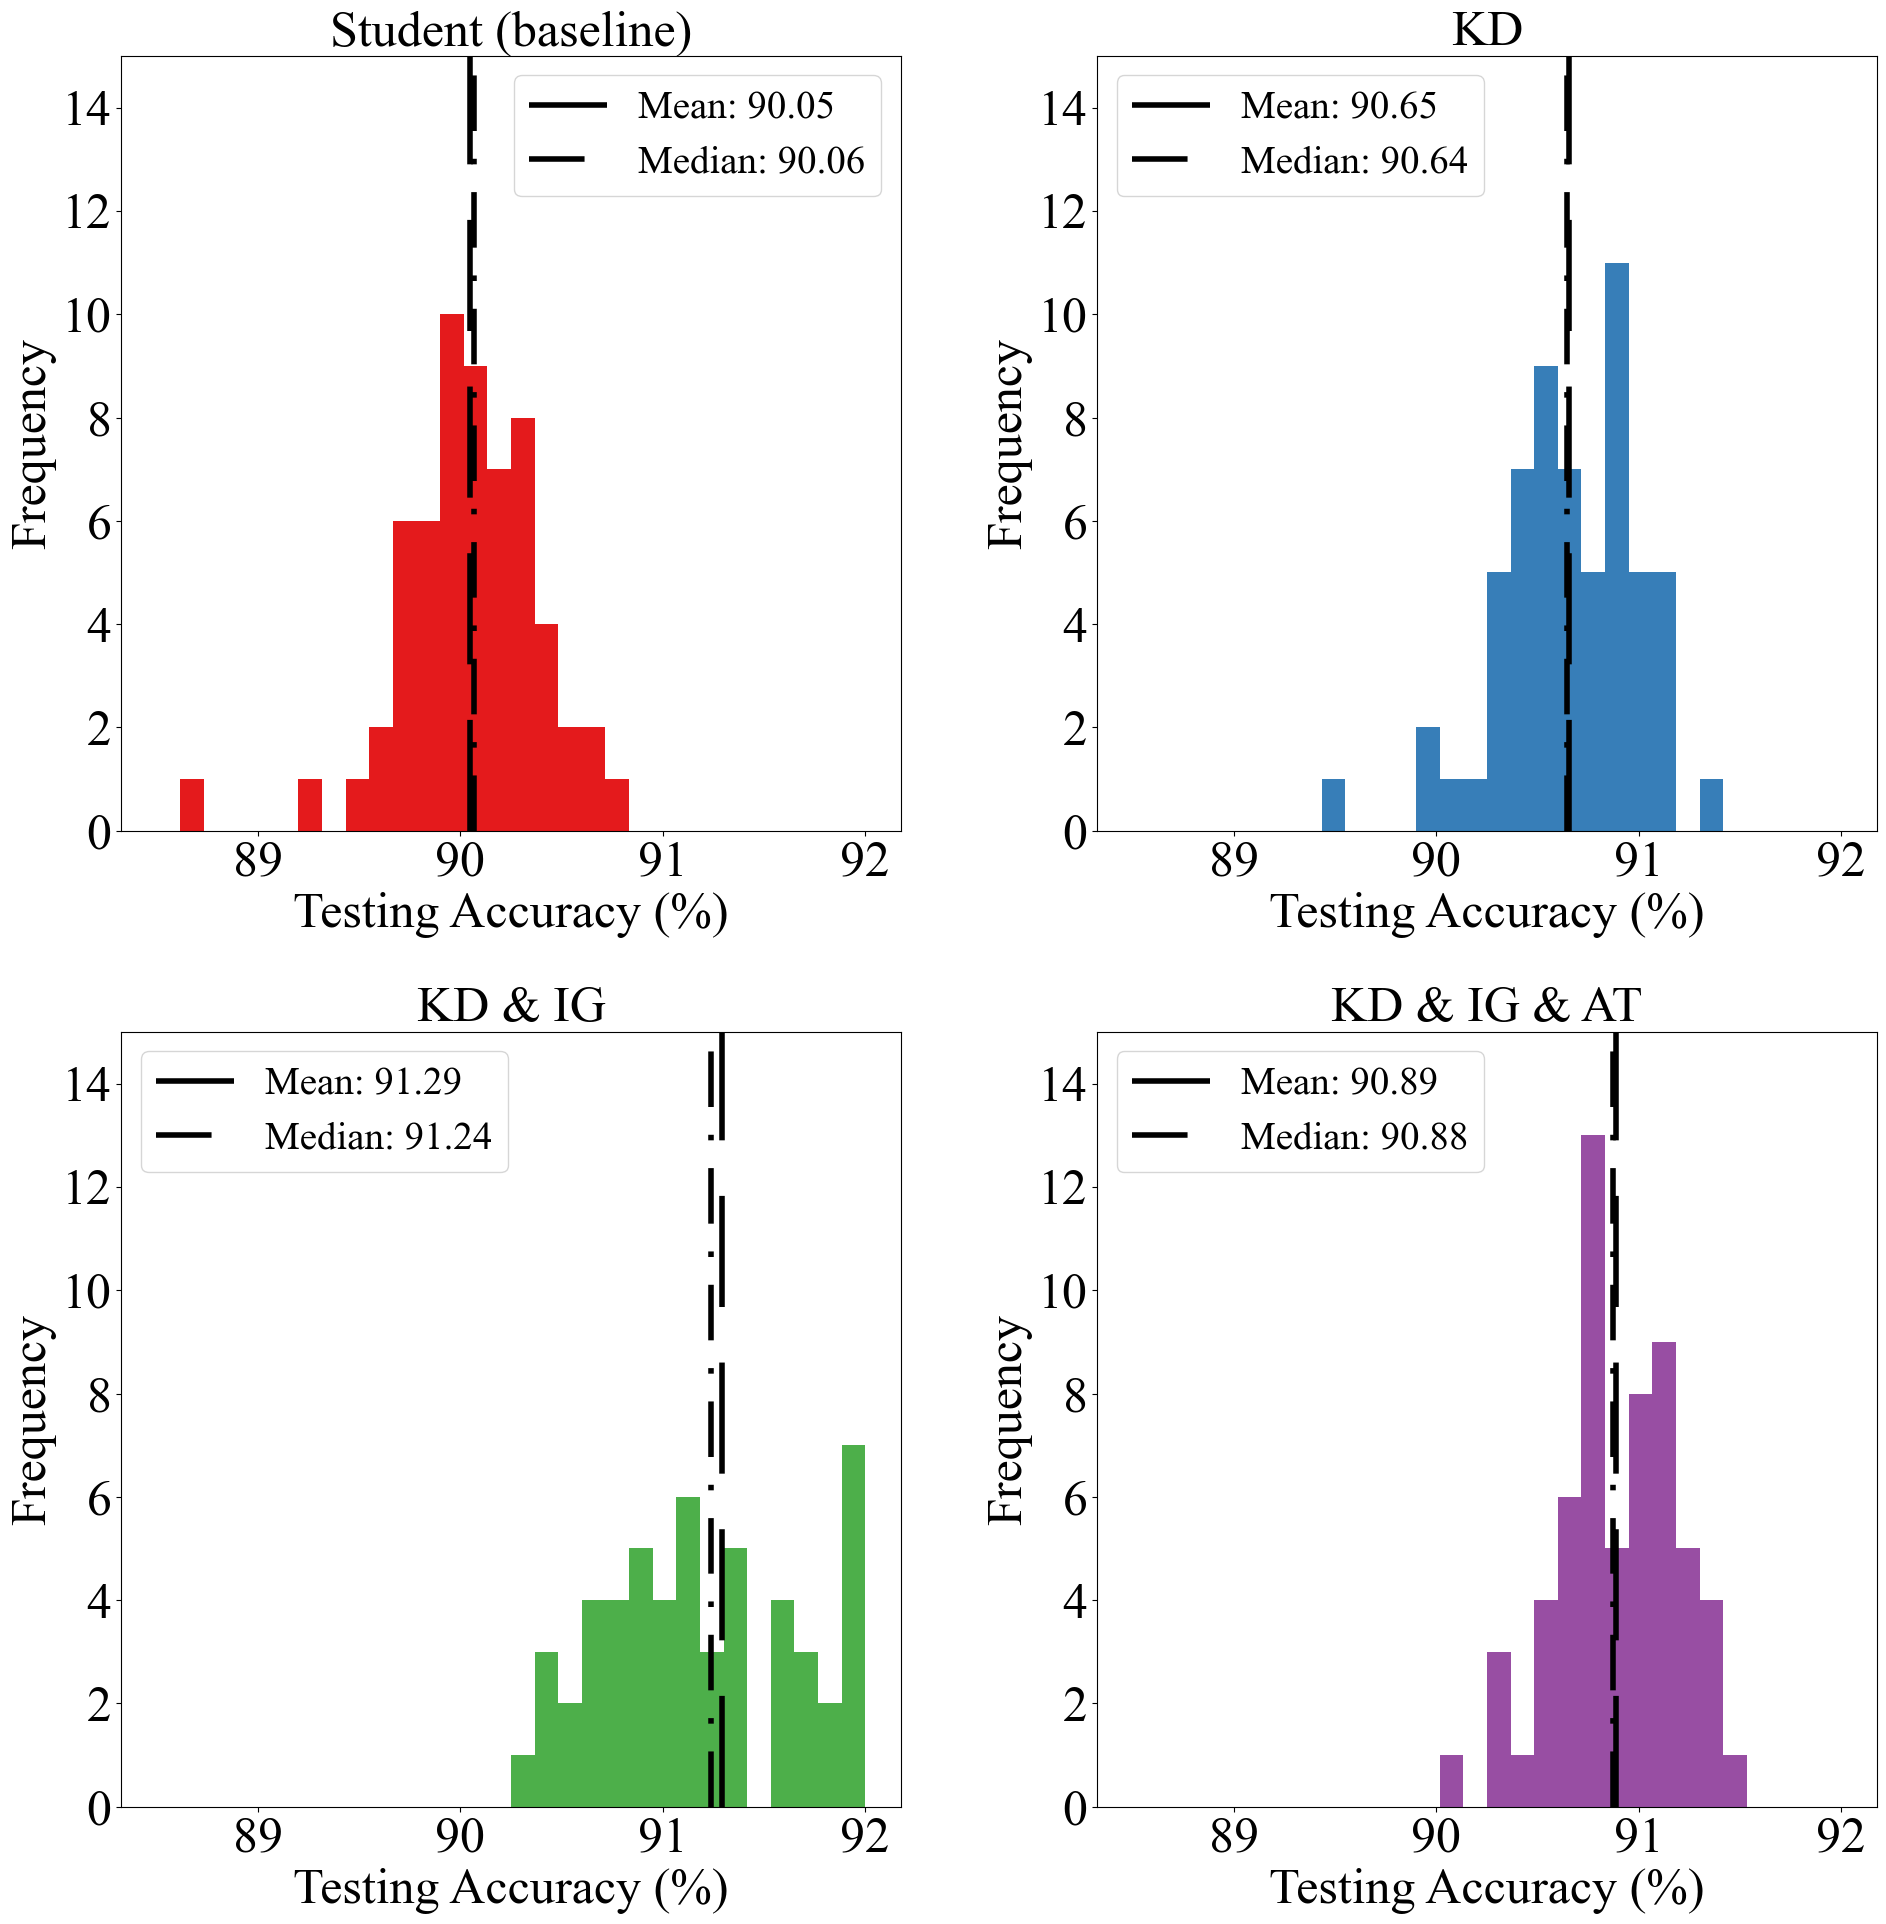

In [ ]:
dash = (20, 10)
dots = ([10, 5, 1, 5])
bins = 30
range=(88.5, 92)
rows = 2
columns = 2
title_size = 36
font_size = 36
ylim = (0,15)

plt.figure(figsize=(20,20))
plt.subplot(rows,columns,1)
plt.hist(student['Test Accuracy'], bins=bins, color='#e41a1c', range=range)
plt.axvline(student_mean, color='black', linestyle='--', label=f"Mean: {student_mean:.2f}", dashes=dash)
plt.axvline(student_median, color='black', linestyle='dashdot', label=f"Median: {student_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("Student (baseline)", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,2)
plt.hist(montecarlo_kd['Test Accuracy'], bins=bins, color='#377eb8', range=range)
plt.axvline(KD_mean, color='black', linestyle='--', label=f"Mean: {KD_mean:.2f}", dashes=dash)
plt.axvline(KD_median, color='black', linestyle='dashdot', label=f"Median: {KD_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,3)
plt.hist(kd_ig['Test Accuracy'], bins=bins, color='#4daf4a', range=range)
plt.axvline(KD_IG_mean, color='black', linestyle='--', label=f"Mean: {KD_IG_mean:.2f}", dashes=dash)
plt.axvline(KD_IG_median, color='black', linestyle='dashdot', label=f"Median: {KD_IG_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD & IG", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.subplot(rows,columns,4)
plt.hist(kd_ig_at['Test Accuracy'], bins=bins, color='#984ea3', range=range)
plt.axvline(KD_IG_AT_mean, color='black', linestyle='--', label=f"Mean: {KD_IG_AT_mean:.2f}", dashes=dash)
plt.axvline(KD_IG_AT_median, color='black', linestyle='dashdot', label=f"Median: {KD_IG_AT_median:.2f}", dashes=dots)
plt.xlabel("Testing Accuracy (%)", fontsize=font_size)
plt.ylabel("Frequency", fontsize=font_size)
plt.title("KD & IG & AT", fontsize=title_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(fontsize=28)
plt.ylim(ylim)

plt.tight_layout()
plt.savefig("Hernandez2024_montecarlo_subplots.pdf")
plt.show()

# Bar Chart

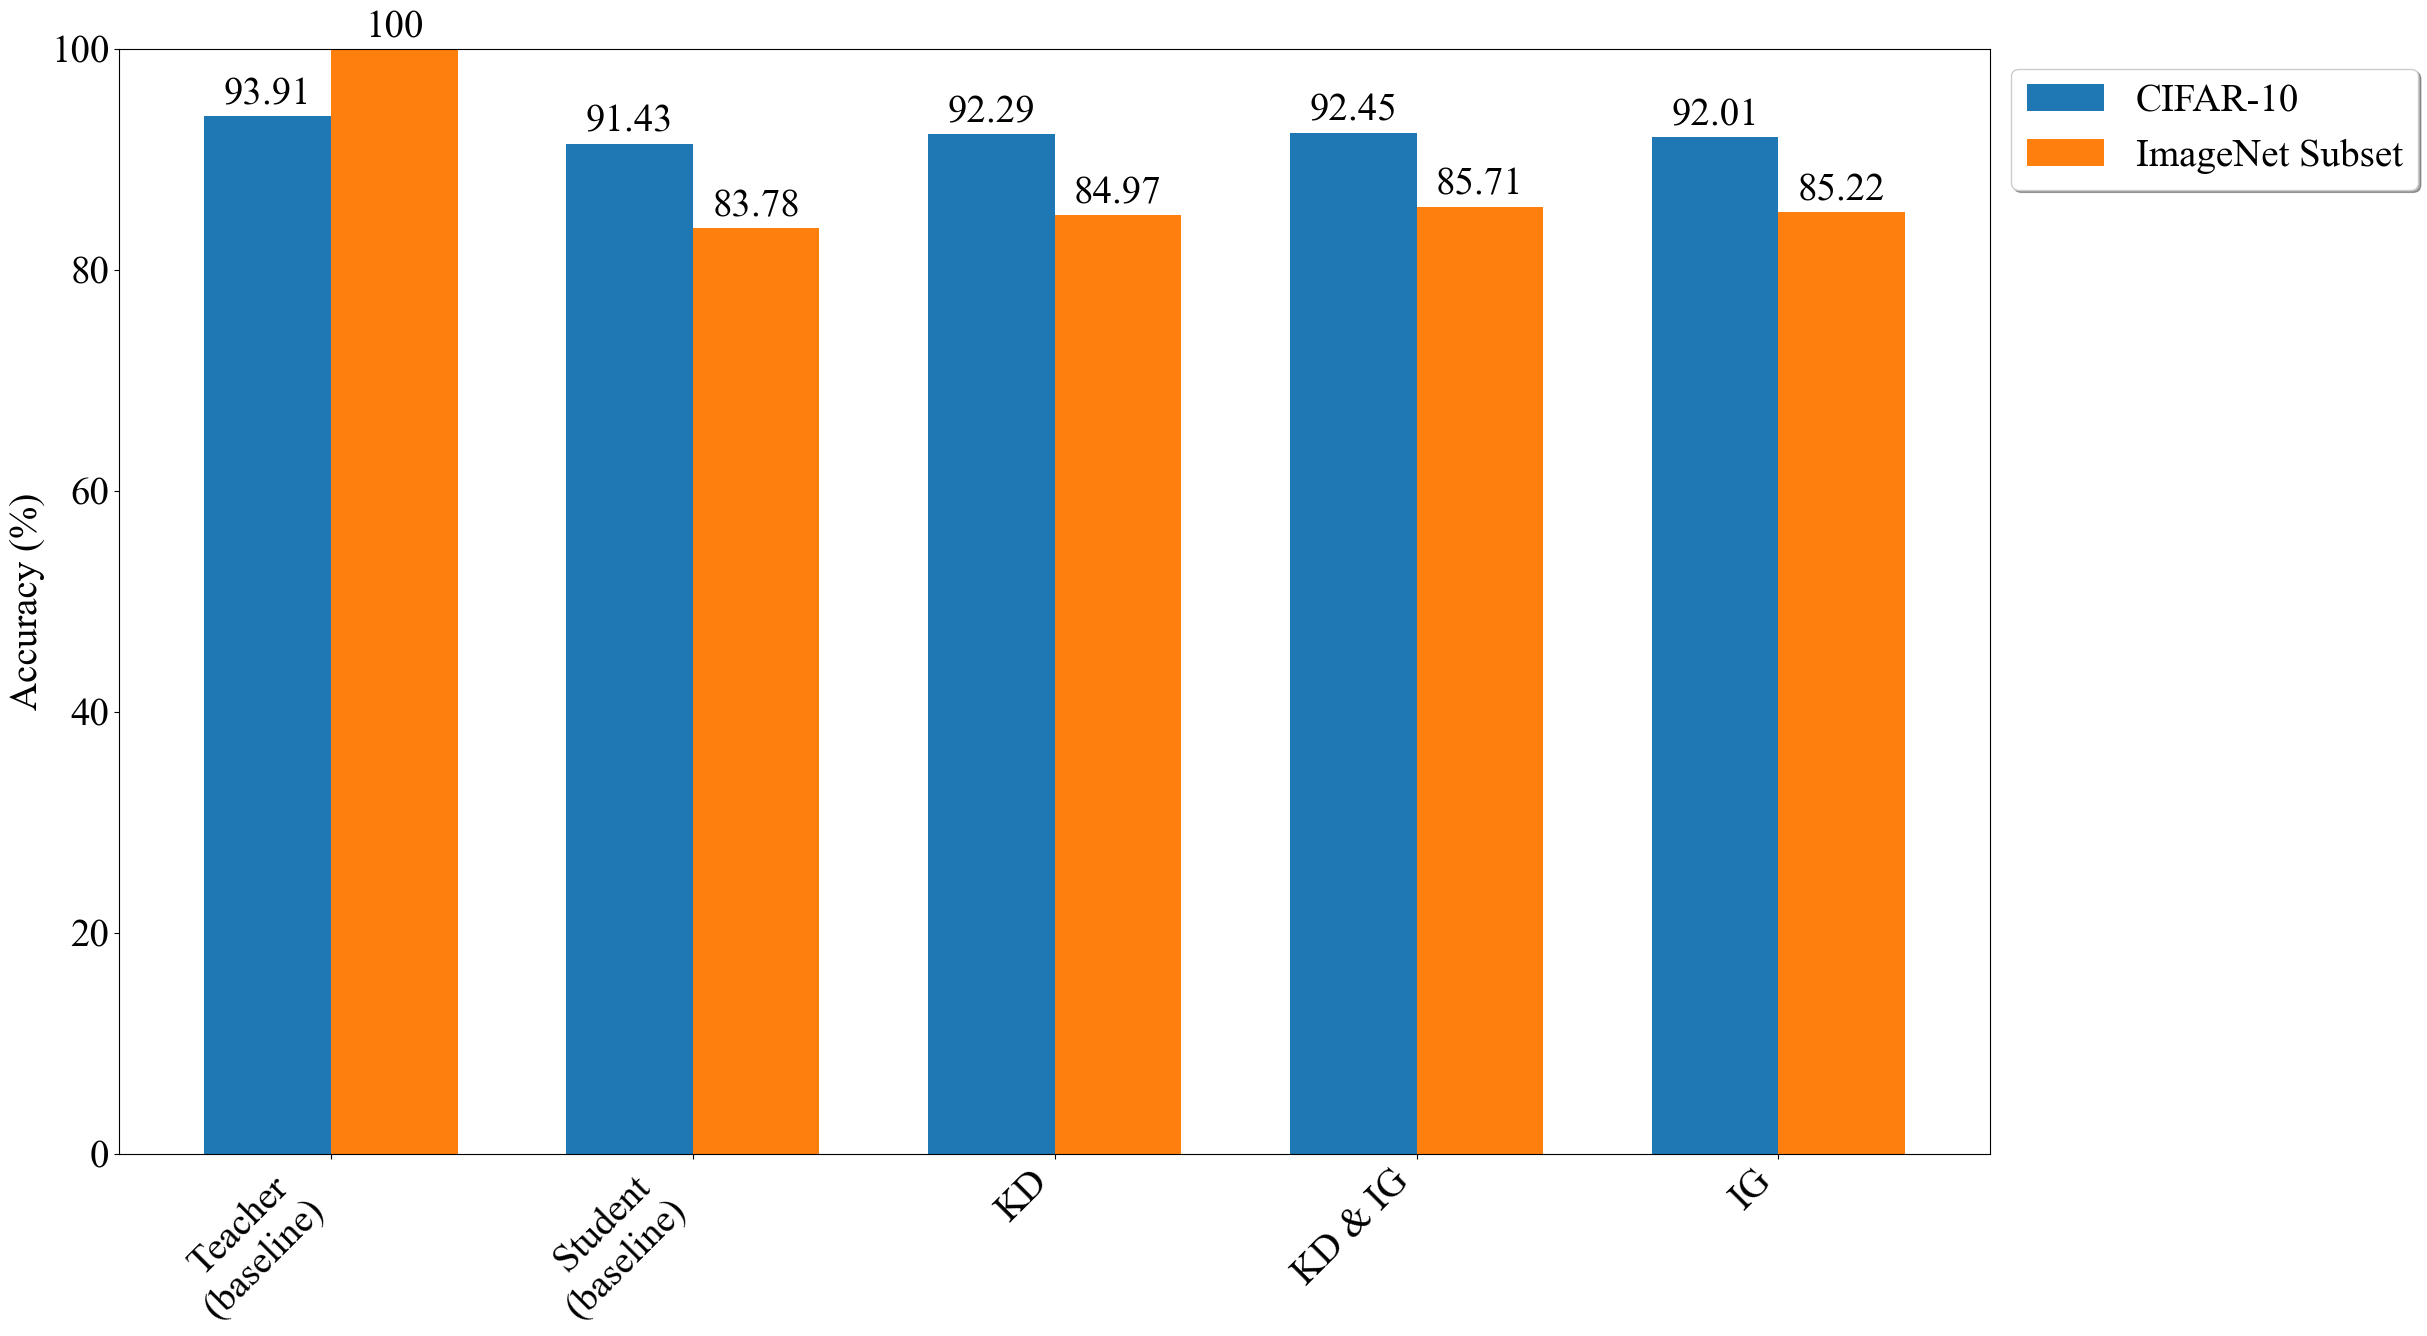

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use(r"rw_visualization.mplstyle")

# Set global font properties
plt.rcParams['font.family'] = 'serif'  # For example, 'serif', 'sans-serif', 'monospace'
plt.rcParams['font.serif'] = ['Times New Roman']  # Or another font from your system
plt.rcParams['font.size'] = 28  # You can adjust the size as needed
plt.rcParams['axes.titlesize'] = 40

# Data
models = ['Teacher \n(baseline)', 'Student \n(baseline)', 'KD', 'KD & IG', 'IG']
cifar_10 = [93.91, 91.43, 92.29, 92.45, 92.01]
imagenet = [100.00, 83.78, 84.97, 85.71, 85.22]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,14))
rects1 = ax.bar(x - width/2, cifar_10, width, label='CIFAR-10')
rects2 = ax.bar(x + width/2, imagenet, width, label='ImageNet Subset')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
# ax.set_title('Model Performance on CIFAR-10 and ImageNet Subset')
ax.set_ylim(0,100)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend(loc='upper center', bbox_to_anchor=(1.12, 1),
          fancybox=True, shadow=True, ncol=1)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("Imagenet_bar_chart.pdf")
plt.show()


# CF vs ACC

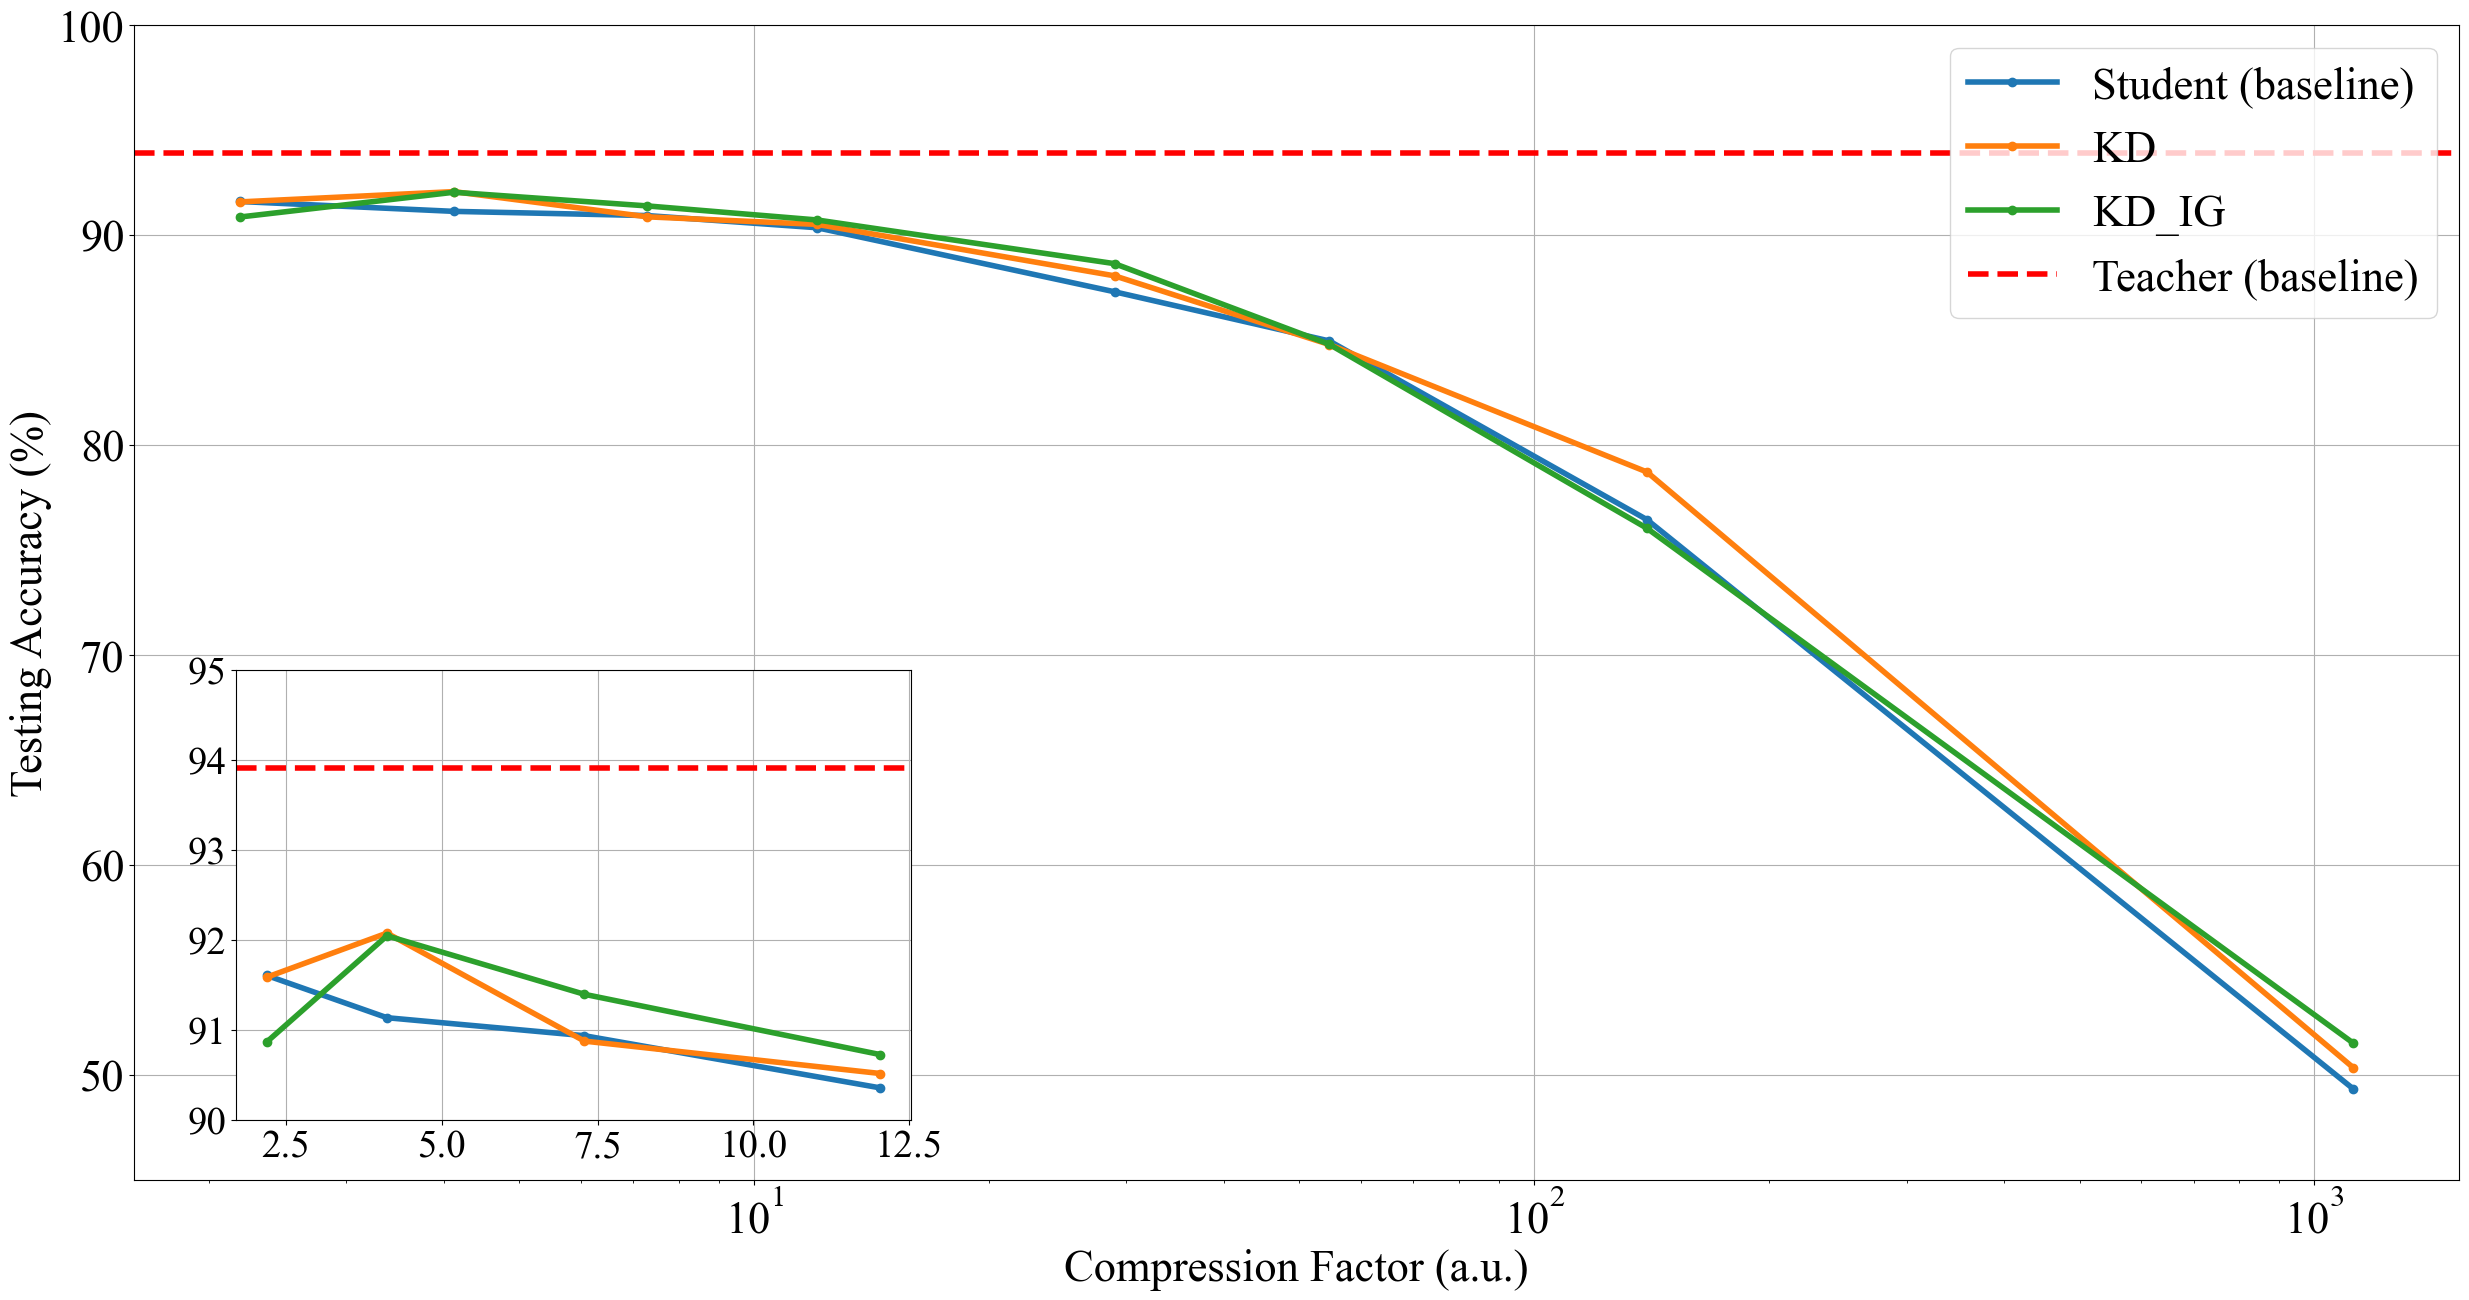

In [ ]:
# Data for the main plot
compression_factors_main = [2.19, 4.12, 7.29, 12.04, 28.97, 54.59, 139.43, 1121.71]
student_baseline_main = [91.61, 91.14, 90.94, 90.36, 87.31, 84.97, 76.46, 49.35]
kd_baseline_main = [91.59, 92.08, 90.88, 90.52, 88.07, 84.80, 78.73, 50.36]
kd_ig_pre_trained_true_main = [91.90, 91.85, 92.19, 90.66, 87.81, 84.68, 76.68, 48.82]
kd_ig_pre_trained_false_main = [90.87, 92.05, 91.40, 90.73, 88.65, 84.81, 76.05, 51.53]

# Data for the minimap
compression_factors_mini = [2.19, 4.12, 7.29, 12.04]
student_baseline_mini = [91.61, 91.14, 90.94, 90.36]
kd_baseline_mini = [91.59, 92.08, 90.88, 90.52]
kd_ig_pre_trained_true_mini = [91.90, 91.85, 92.19, 90.66]
kd_ig_pre_trained_false_mini = [90.87, 92.05, 91.40, 90.73]

# Main figure setup
plt.figure(figsize=(30, 15))  # Adjusted for general use, scale up if needed
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 32  # You can adjust the size as needed
plt.rcParams['lines.linewidth'] = 4
main_ax = plt.gca()
main_ax.plot(compression_factors_main, student_baseline_main, marker='o', label='Student (baseline)')
main_ax.plot(compression_factors_main, kd_baseline_main, marker='o', label='KD')
# main_ax.plot(compression_factors_main, kd_ig_pre_trained_true_main, marker='o', label='KD_IG$_{Pretrained=True}$')
main_ax.plot(compression_factors_main, kd_ig_pre_trained_false_main, marker='o', label='KD_IG')
main_ax.axhline(y=93.91, color='red', linestyle='dashed', label="Teacher (baseline)")
main_ax.set_xscale('log')
main_ax.set_xlabel('Compression Factor (a.u.)')
main_ax.set_ylabel('Testing Accuracy (%)')
main_ax.set_ylim(45, 100)
# main_ax.set_title('Delta Accuracy vs Compression Factor')
main_ax.grid(True)
main_ax.legend(loc=1)

# Inset / Minimap
inset_ax = plt.axes([0.159, 0.15, 0.225, 0.3])  # Example placement: top right corner of main plot
inset_ax.axhline(y=93.91, color='red', linestyle='dashed', label="Teacher (baseline)")
for data in [student_baseline_mini, kd_baseline_mini,kd_ig_pre_trained_false_mini]:
    inset_ax.plot(compression_factors_mini, data, marker='o')
# inset_ax.set_xscale('log')
# inset_ax.set_title('Detailed View of Lower Compression Factors')
inset_ax.grid(True)

# Optionally, customize the tick labels for clarity
inset_ax.tick_params(axis='x', which='major', labelsize=28)
inset_ax.tick_params(axis='y', which='major', labelsize=28)
inset_ax.set_yticks([90,91,92,93,94,95])

plt.savefig("Hernandez2024_acc_vs_cf_inset.pdf")
plt.show()